# Long Term Market Trend - A Lazy Projection with OLS

**Background**

One of the oldest attempts to predict market returns in recent history is to be traced back to **Charles H. Dow** (1851–1902), who with Edward Jones and Charles Bergstresser, founded Dow Jones & Company, Inc. and in 1896 developed the Dow Jones Industrial Average and the Dow Jones Transportation Average to track the moves of the economy and help him make money trading stocks.

The theory was derived from 255 editorials he wrote in The Wall Street Journal, of which he was founder and first editor. Following Dow's death, William Peter Hamilton, Robert Rhea and E. George Schaefer organized and collectively represented the **Dow theory**, based on Dow's editorials.

One of the most well known Dow theorists was **Richard Russel** (1924-2015), who began publishing the **Dow Theory Letters** in 1958 until his death, making his 3-weekly newsletter oldest service continuously written by one person in the business.

Russell gained wide recognition via a series of over 30 Dow Theory and technical articles that he wrote for Barron's during the late-'50s through the '90s. Through Barron's and via word of mouth, he gained a wide following. Russell was the first (in 1960) to recommend gold stocks. He called the top of the 1949-'66 bull market. And almost to the day he called the bottom of the great 1972-'74 bear market, and the beginning of the great bull market which started in December 1974.

In one of his letters dated back to early 2006, Russel wrote:

*''Over a short span, the markets can do anything, and anything can happen [...] Over an extended period of time, and I'm talking years - 2 plus 2 has always equalled 4. The surest rule in the stock market is the rule ... called **regression to the mean**.''*

**Rationale**

Considering the market turmoil we have been facing in the post-Covid world, and keeping in mind the words of Russel, the aim of this little project is to put a selected market index price into perspective with its long term performance performing a *LAZY* "Fair Value" projection based on a simple Linear Regression model.
   

### 1. Import Libriaries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression 

### 2. Tickers Selection

Market indeces used for the anlysis will be i) Nasdaq 100, ii) S&P 500, iii) Dow Jones Industrial Average and iv) Russel 2000. Price data will be collected from Yahoo Finance.

In [2]:
tickers = ['^GSPC','NDX','^DJI','^RUT']
names = ['S&P 500','Nasdaq','Dow Jones Ind. Average','Russel 2000']

### 3. Import Data

In [3]:
dataset = pdr.DataReader(tickers,data_source='yahoo',start='01/01-1900').Close

### 4. Data Analaysis

In [4]:
dataset.head()

Symbols,^GSPC,NDX,^DJI,^RUT
Date,,,,
1927-12-30,17.660000,NaN,NaN,NaN
1928-01-03,17.760000,NaN,NaN,NaN
1928-01-04,17.719999,NaN,NaN,NaN
1928-01-05,17.549999,NaN,NaN,NaN
1928-01-06,17.660000,NaN,NaN,NaN


In [5]:
dataset.tail()

Symbols,^GSPC,NDX,^DJI,^RUT
Date,,,,
2022-10-31,3871.979980,11405.570312,32732.949219,1846.859985
2022-11-01,3856.100098,11288.950195,32653.199219,1851.390015
2022-11-02,3759.689941,10906.339844,32147.759766,1789.140015
2022-11-03,3719.889893,10690.599609,32001.250000,1779.729980
2022-11-04,3770.550049,10857.030273,32403.220703,1799.869995


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23827 entries, 1927-12-30 to 2022-11-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   23827 non-null  float64
 1   NDX     9352 non-null   float64
 2   ^DJI    7771 non-null   float64
 3   ^RUT    8861 non-null   float64
dtypes: float64(4)
memory usage: 930.7 KB


In [7]:
first_valid_date = {dataset[ticker].first_valid_index() for ticker in tickers}
list(zip(names,first_valid_date))

[('S&P 500', Timestamp('1927-12-30 00:00:00')),
 ('Nasdaq', Timestamp('1987-09-10 00:00:00')),
 ('Dow Jones Ind. Average', Timestamp('1985-10-01 00:00:00')),
 ('Russel 2000', Timestamp('1992-01-02 00:00:00'))]

Data availability on Yahoo Finance of the different indices vary substantially, spanning from the S&P 500 being available since December 1927 to the Dow Jones Industrial Average being available only from January 1992.

### 5. Data Preparation

In [8]:
dataset_log = np.log(dataset)
dataset_log.tail()

Symbols,^GSPC,NDX,^DJI,^RUT
Date,,,,
2022-10-31,8.261521,9.341857,10.396137,7.521242
2022-11-01,8.257412,9.331580,10.393698,7.523692
2022-11-02,8.232092,9.297100,10.378098,7.489490
2022-11-03,8.221449,9.277120,10.373530,7.484217
2022-11-04,8.234976,9.292568,10.386013,7.495470


### 6. Data Plotting

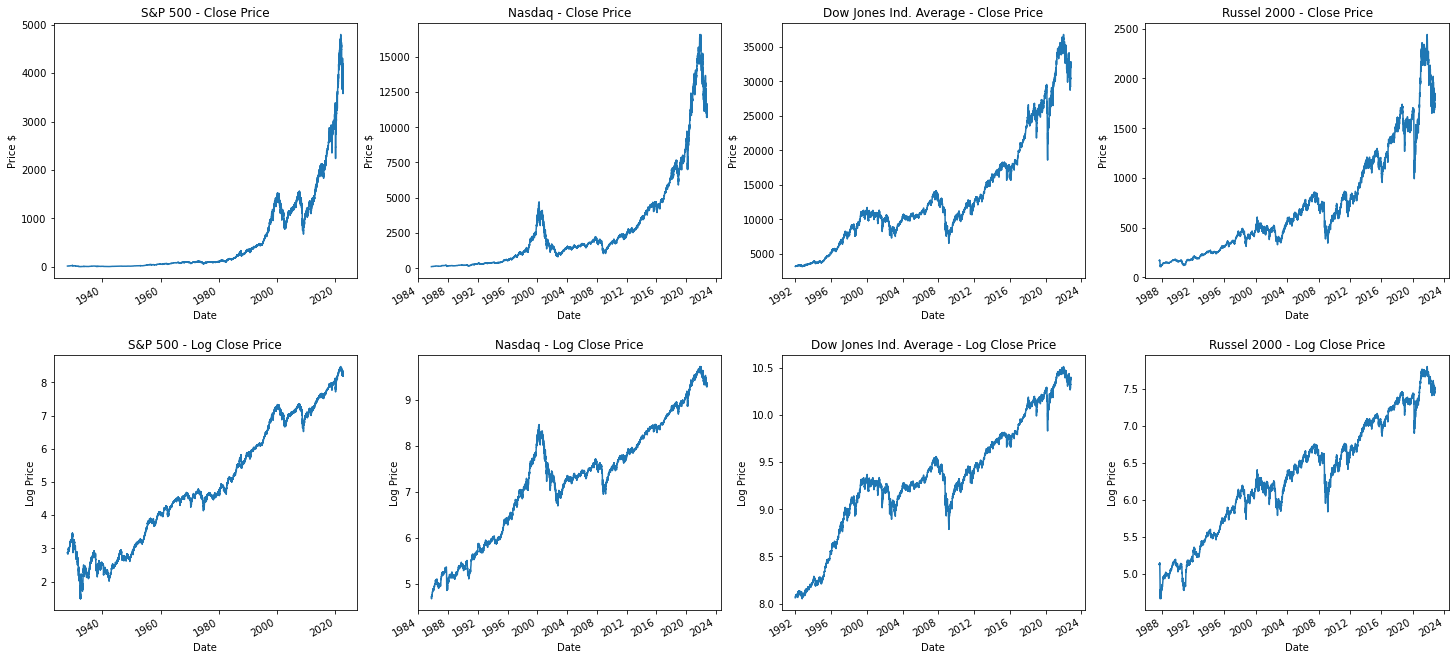

In [9]:
i = 1
plt.figure(figsize=(25,12))
for ticker in tickers:
    plt.subplot(2,4,i)
    dataset[ticker].plot()
    plt.title(f'{names[i-1]} - Close Price')
    plt.ylabel('Price $')

    plt.subplots_adjust(hspace=0.3)
        
    plt.subplot(2,4,i+4)
    dataset_log[ticker].plot()
    plt.title(f'{names[i-1]} - Log Close Price')
    plt.ylabel('Log Price')
    i += 1

All four market indices show a clear exponential trend over time, which doesn't fit a Linear Regression approach, Log prices of the four time series are therefore calculated.

### 7. OLS Regression

In [10]:
# S&P 500
GSPC = pd.DataFrame(dataset_log['^GSPC'][dataset['^GSPC'].first_valid_index():],).rename({'^GSPC':'Log_Close'},axis=1)
GSPC['Count'] = np.arange(GSPC.shape[0])

# OLS model fitting and prediction
model_GSPC = LinearRegression()
model_GSPC.fit(np.array(GSPC.Count[:-252]).reshape(-1,1),GSPC.Log_Close[:-252])
GSPC['OLS'] = model_GSPC.predict(np.array(GSPC.Count).reshape(-1,1))

GSPC['Delta'] = np.exp(GSPC.Log_Close - GSPC.OLS) - 1 

In [11]:
# Nasdaq 100
NDX = pd.DataFrame(dataset_log['NDX'][dataset['NDX'].first_valid_index():],).rename({'NDX':'Log_Close'},axis=1)
NDX['Count'] = np.arange(NDX.shape[0])

# OLS model fitting and prediction
model_NDX = LinearRegression()
model_NDX.fit(np.array(NDX.Count[:-252]).reshape(-1,1),NDX.Log_Close[:-252])
NDX['OLS'] = model_NDX.predict(np.array(NDX.Count).reshape(-1,1))

NDX['Delta'] = np.exp(NDX.Log_Close - NDX.OLS) - 1 

In [12]:
# Dow Jones Industrial Average
DJI = pd.DataFrame(dataset_log['^DJI'][dataset['^DJI'].first_valid_index():],).rename({'^DJI':'Log_Close'},axis=1)
DJI['Count'] = np.arange(DJI.shape[0])

# OLS model fitting and prediction
model_DJI = LinearRegression()
model_DJI.fit(np.array(DJI.Count[:-252]).reshape(-1,1),DJI.Log_Close[:-252])
DJI['OLS'] = model_DJI.predict(np.array(DJI.Count).reshape(-1,1))

DJI['Delta'] = np.exp(DJI.Log_Close - DJI.OLS) - 1 

In [13]:
# Russel 2000
RUT = pd.DataFrame(dataset_log['^RUT'][dataset['^RUT'].first_valid_index():],).rename({'^RUT':'Log_Close'},axis=1)
RUT['Count'] = np.arange(RUT.shape[0])

# OLS model fitting and prediction
model_RUT = LinearRegression()
model_RUT.fit(np.array(RUT.Count[:-252]).reshape(-1,1),RUT.Log_Close[:-252])
RUT['OLS'] = model_RUT.predict(np.array(RUT.Count).reshape(-1,1))

RUT['Delta'] = np.exp(RUT.Log_Close - RUT.OLS) - 1 

### 8. OLS Plotting 

In [14]:
labels = [GSPC,NDX,DJI,RUT]

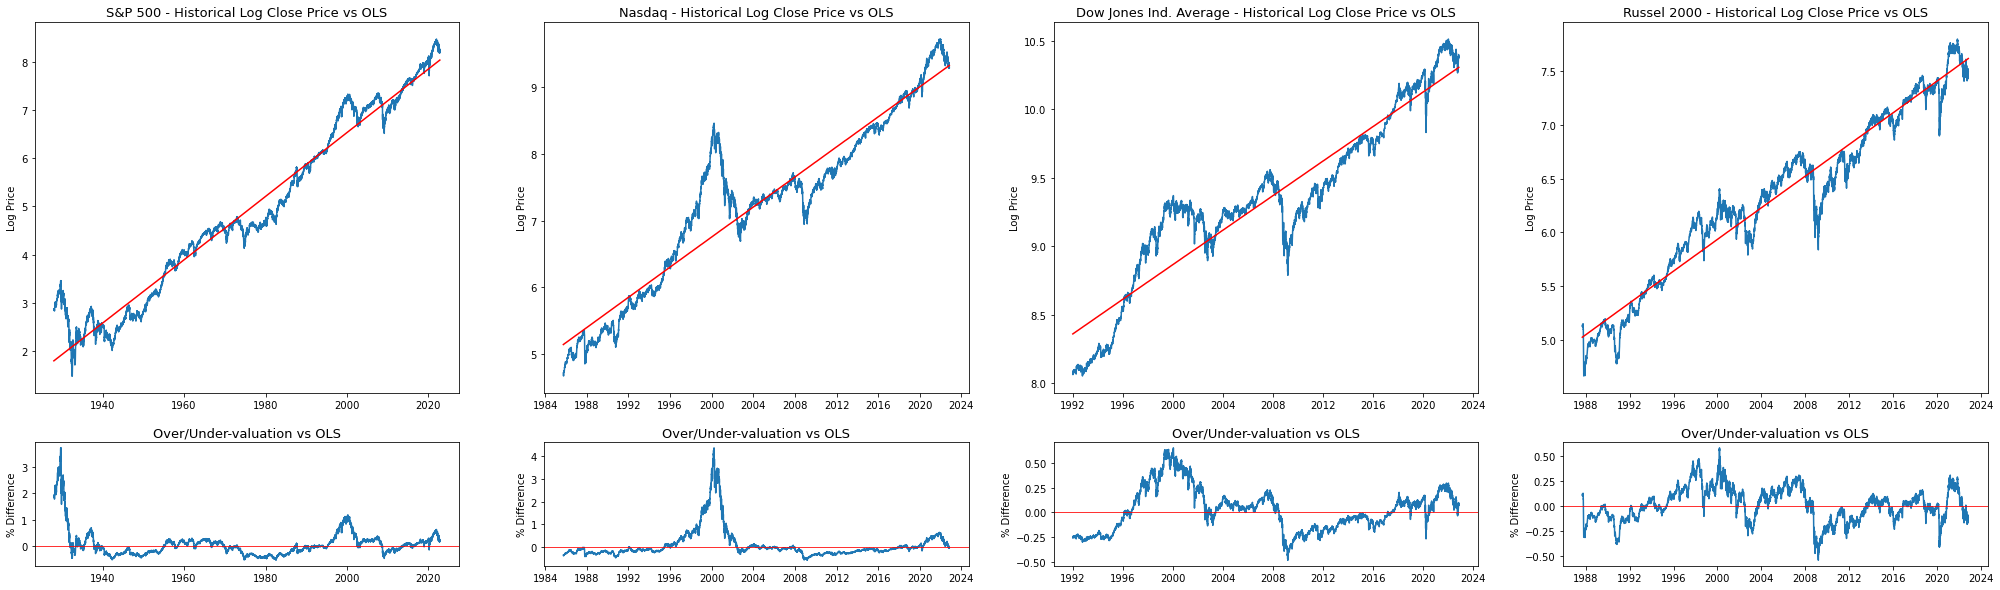

In [15]:
fig = plt.figure(figsize=(35, 10)) 
gs = gridspec.GridSpec(2, 4, height_ratios=[3, 1])

for i in range(len(labels)):
    plt.subplot(gs[i])
    plt.plot(labels[i].Log_Close)
    plt.plot(labels[i].OLS, color='r')
    plt.title(f'{names[i]} - Historical Log Close Price vs OLS',fontsize=13)
    plt.ylabel('Log Price')
    
    plt.subplot(gs[i+4])
    plt.plot(labels[i].Delta)
    plt.axhline(0,lw=0.8,c='r')
    plt.title('Over/Under-valuation vs OLS',fontsize=13)
    plt.ylabel('% Difference')

The charts above show the OLS regression line fitting to the Log Price of the four indices under assessment as well as the price delta between the current and regression price. The Model was trained using the whole data series excluding the last trading year (252 days).

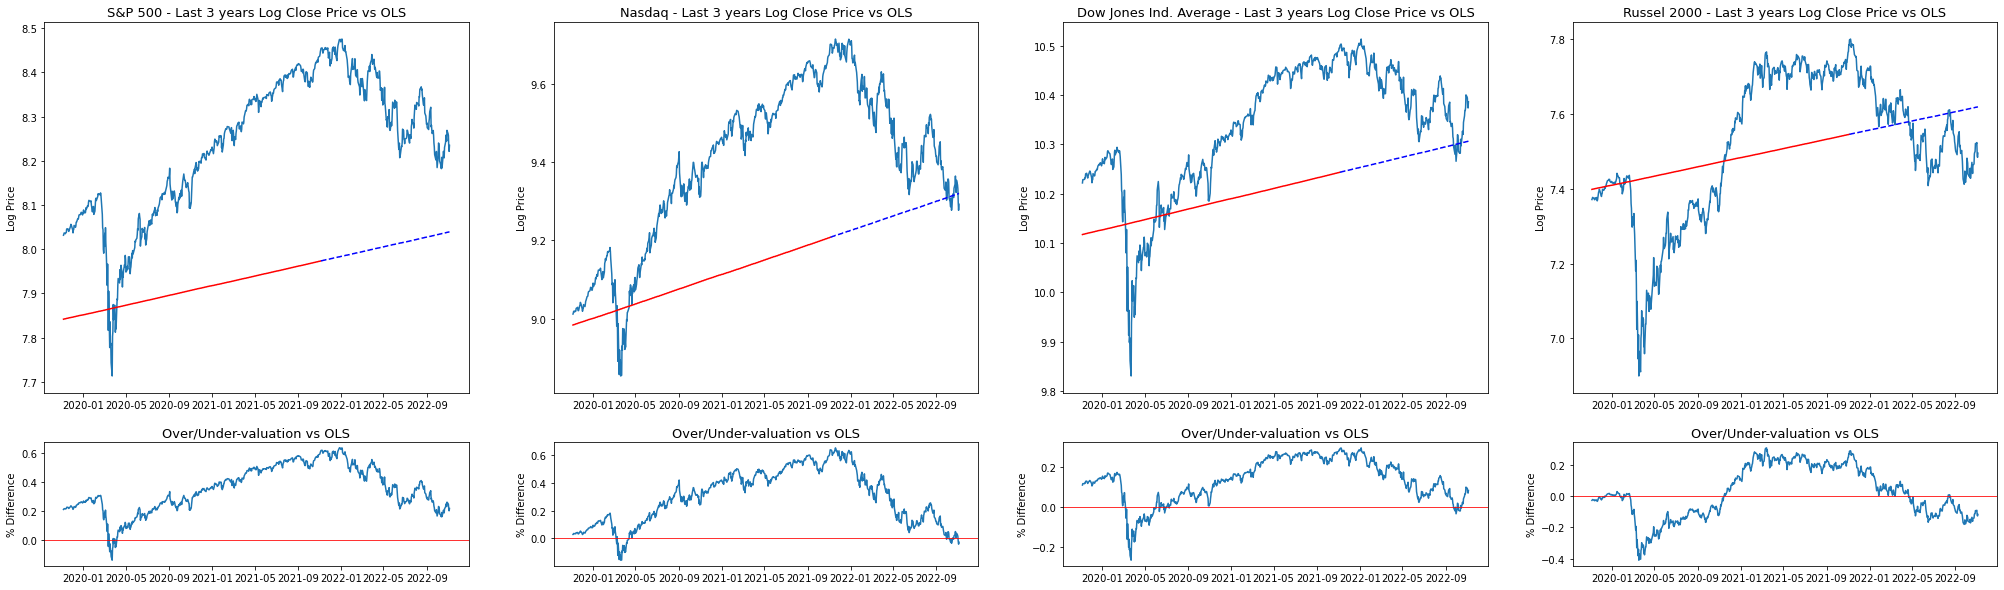

In [16]:
fig = plt.figure(figsize=(35, 10)) 
gs = gridspec.GridSpec(2, 4, height_ratios=[3, 1])

for i in range(len(labels)):
    plt.subplot(gs[i])
    plt.plot(labels[i].iloc[-756:].Log_Close)
    plt.plot(labels[i].iloc[-756:].OLS[:-252], color='r')
    plt.plot(labels[i].iloc[-756:].OLS[-252:], color='b',ls='--')
    plt.title(f'{names[i]} - Last 3 years Log Close Price vs OLS',fontsize=13)
    plt.ylabel('Log Price')
    
    plt.subplot(gs[i+4])
    plt.plot(labels[i].iloc[-756:].Delta)
    plt.axhline(0,lw=0.8,c='r')
    plt.title('Over/Under-valuation vs OLS',fontsize=13)
    plt.ylabel('% Difference')

The charts above focus on the last 3 trading years (756 days). The dotted right hand side of the regression line is the predicted portion of the OLS model. From a graphic perspective, we can notice how the regression line behaved as a good dynamic level of support/resistance over the last trading year, especially for the Russel 2000. The regression line was tested several times as support before price breakout, to which followed a further retest, where the latter successfully acted as resistance.

### 8. Valuation

In [17]:
valuation = pd.DataFrame(index=names,columns=('Date','Last Price','Fair Value','Delta $','Delta %'))

In [18]:
for i in range(len(labels)):
    valuation['Last Price'].iloc[i] = dataset[tickers[i]][-1]
    valuation['Fair Value'].iloc[i] = np.exp(labels[i].OLS[-1])

valuation['Date'] = datetime.strftime(dataset.index[-1], '%d/%m/%Y')
valuation['Delta $'] = valuation['Last Price'] - valuation['Fair Value']
valuation['Delta %'] = (valuation['Last Price']/valuation['Fair Value']-1)

valuation

,Date,Last Price,Fair Value,Delta $,Delta %
S&P 500,04/11/2022,3770.55,3100.89,669.659,0.215957
Nasdaq,04/11/2022,10857,11164.5,-307.421,-0.0275357
Dow Jones Ind. Average,04/11/2022,32403.2,29923.1,2480.12,0.0828831
Russel 2000,04/11/2022,1799.87,2037.59,-237.719,-0.116667


In [19]:
date = datetime.strftime(dataset.index[-1], '%d/%m/%Y')
underval_count = valuation['Delta $'][valuation['Delta $'] > 0].count()
val_max = valuation.loc[valuation['Delta %'] == valuation['Delta %'].max()]
val_min = valuation.loc[valuation['Delta %'] == valuation['Delta %'].min()]

### 9. Conclusion

In [20]:
print(f'''As of {date}, {underval_count} of the 4 indices under assessment traded at a price below their long term regression line. The most overvalued was the {val_max.index[0]}, which traded at a price of {val_max['Last Price'].mean().round(2)}, compared to a long term fair value of {val_max['Fair Value'].mean().round(2)} ({'{:.2%}'.format(val_max['Delta %'].mean().round(4))}). The most undervalued was instead the {val_min.index[0]}, which traded at a price of {val_min['Last Price'].mean().round(2)}, compared to a long term fair value of {val_min['Fair Value'].mean().round(2)} ({'{:.2%}'.format(val_min['Delta %'].mean().round(4))}).''')

As of 04/11/2022, 2 of the 4 indices under assessment traded at a price below their long term regression line. The most overvalued was the S&P 500, which traded at a price of 3770.55, compared to a long term fair value of 3100.89 (21.60%). The most undervalued was instead the Russel 2000, which traded at a price of 1799.87, compared to a long term fair value of 2037.59 (-11.67%).
